# Thompson Sampling

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Ads_CTR_Optimisation.csv')
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [33]:
import random
N = len(df.index) #number of total users (rounds)
d = len(df.columns) #number of different ad versions
ads_selected = [] #list of different ad versions that are selected at each round
number_of_rewards_1 = [0] * d 
number_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        #Beta distribution parametrized by the number of rewards 1 (+1) and number of rewards 0 (+1) by the ad
        #For each ad we take a random draw from the distribution below
        random_beta = random.betavariate(number_of_rewards_1[i]+1, number_of_rewards_0[i]+1) 
        #Then we select the ad with the highest draw
        if (random_beta > max_random):
            max_random = random_beta
            ad = i 
    ads_selected.append(ad)
    #We get the reward from that ad at this particular round
    reward = df.values[n,ad]
    if reward == 1:
        number_of_rewards_1[ad] += 1
    else:
        number_of_rewards_0[ad] += 1
    total_reward += reward 
    
print('Number of rewards 1 for each ad : ',number_of_rewards_1) 
print('Number of rewards 0 for each ad : ',number_of_rewards_0) 
print('Total sum of rewards : ',total_reward)

Number of rewards 1 for each ad :  [9, 30, 0, 2, 2451, 0, 4, 95, 1, 1]
Number of rewards 0 for each ad :  [72, 136, 26, 38, 6671, 26, 38, 337, 33, 30]
Total sum of rewards :  2593


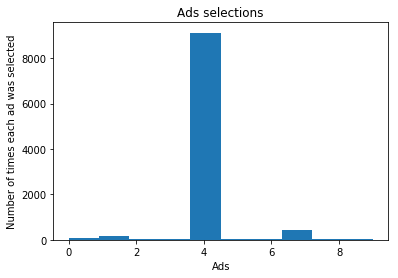

In [34]:
plt.hist(ads_selected)
plt.title('Ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()